In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat


%matplotlib inline

/Users/Mig/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<b> Pulling the Data Out </b>

In [3]:
data = loadmat('ex5data1.mat')

print data.keys() # X,y: training| Xval, yval: CV | Xtest, ytest: test

X_train = np.c_[np.ones((data['X'].shape[0], 1)), data['X']]
y_train = data['y']
X_cv = np.c_[np.ones((data['Xval'].shape[0], 1)), data['Xval']]
y_cv = data['yval']
X_test = np.c_[np.ones((data['Xtest'].shape[0], 1)), data['Xtest']]
y_test = data['ytest']

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']


<b> Plotting the Data </b>

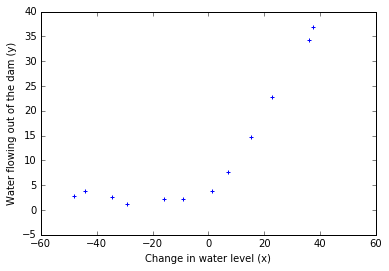

In [4]:
plt.scatter(X_train[:, 1:], y_train, marker="+")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

<b> Regularized Linear Regression </b>

In [5]:
from __future__ import division

theta_init = np.array([[1],[1]])

def h(X, theta):
    values = X.dot(theta.reshape(-1,1)) # 12x2 * 2x1
    return values

def compute_cost(theta, X, y, reg):
    m = X.shape[0]
    
    J = (1/(2*m)) * np.sum(np.square((h(X, theta)-y))) + (reg/(2*m))*(np.sum(theta.reshape(-1,1)**2))
    
    return J

compute_cost(theta_init, X_train, y_train, 1)

304.03485888693092

In [6]:
def compute_gradient(theta, X, y, reg):
    m = X.shape[0]
    
    gradient_0 = (1/m) * np.sum( (h(X,theta) - y)*X[:,0:1] )
    gradient_1 = (1/m) * np.sum( (h(X,theta) - y)*X[:,1:] ) + ((reg/m) * np.sum(theta[:].reshape(-1,1)**2))
    
    gradient = np.r_[gradient_0, gradient_1]
    
    return gradient.flatten()

compute_gradient(theta_init, X_train, y_train, 1)

array([ -15.30301567,  598.33407751])

<b> Optimizing Theta </b>

In [7]:
from scipy.optimize import minimize

def train(X, y, theta, reg):
    output = minimize(compute_cost, theta, args=(X, y, reg), method=None, jac=compute_gradient, options={'maxiter':1000})
    return output

params = train(X_train, y_train, theta_init, 0)['x']

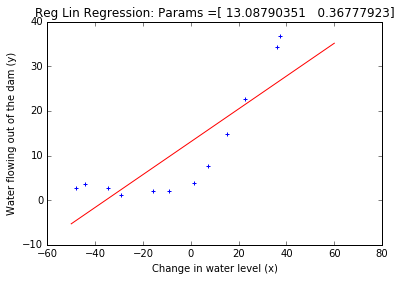

In [8]:
plt.scatter(X_train[:, 1:], y_train, marker="+")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Reg Lin Regression: Params ={0}'.format(params))

xx = np.linspace(-50,60,100)
xx = np.c_[np.ones((xx.shape[0],1)), xx]
yy = xx.dot(params)

plt.plot(xx[:,1:], yy, color='r')


[[  53.45870143]
 [ 110.30036611]
 [  45.01023138]
 [  48.36891137]
 [  35.86516475]
 [  33.8299616 ]
 [  31.9709858 ]
 [  30.86244632]
 [  31.13599796]
 [  28.93620747]
 [  29.55143162]
 [  29.43381813]]


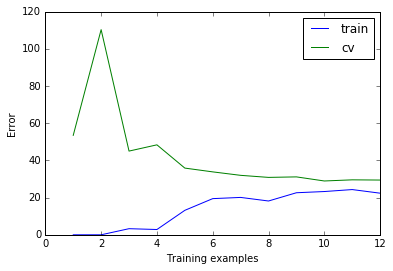

In [9]:
def get_errors(X, y, X_cv, y_cv, theta, reg, i):
    
    train_error, cv_error = np.ones((i,1)), np.ones((i,1))
    
    for n in range(0,i):
        x_inter, y_inter = X[0:n+1,:], y[0:n+1,:]
        params = train(x_inter, y_inter, theta, reg)['x']
        train_error[n] = compute_cost(params, x_inter, y_inter, reg)
        cv_error[n] = compute_cost(params, X_cv, y_cv, reg)

    return train_error, cv_error


theta_init = np.array([10,10]).reshape(-1,1)

params = train(X_train[0:1,:], y_train[0:1,:], theta_init, 0)['x']
#print compute_cost(params, X_cv, y_cv, 0)


train_error, cv_error = get_errors(X_train, y_train, X_cv, y_cv, theta_init, 0, 12)
print cv_error
plt.plot(np.arange(1,13), train_error, label="train")
plt.plot(np.arange(1,13), cv_error, label="cv")
plt.xlabel("Training examples")
plt.ylabel("Error")

plt.legend()

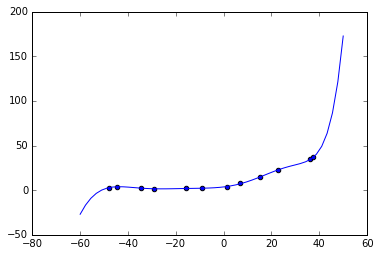

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Initially tried to train/minimize via functions defined earlier but got random errors so tried sklearn instead.

poly = PolynomialFeatures(8)
X_poly = poly.fit_transform(X_train[:,1].reshape(-1,1))

# Use Ridge() object for regularized with L2 norm
regression = LinearRegression()
regression.fit(X_poly, y_train)

xx = np.linspace(-60,50)

# regression.coef_ is 1x9 (fit to the polynomial (8))
# Axis = 0 along rows (v), axis = 1 along columns (>)
yy = regression.intercept_+ np.sum(regression.coef_ * poly.fit_transform(xx.reshape(-1,1)), axis=1)

plt.scatter(X_train[:,1:], y_train)
plt.plot(xx, yy)